# **Machine Learning Model for Predicting E-Commerce Customer Churn**

In this notebook, our goal is to explore and implement the best machine learning models for predicting customer churn using the E-commerce Customer Churn Dataset. This project is part of Purwadhika's Digital Talent Incubator (DTI) Data Science program, specifically Capstone 3 Machine Learning.

# **Table Of Content**


1. Business Problem Understanding
    <br> 1.1. Context
    <br> 1.2. Problem Statements
    <br> 1.3. Objectives
    <br> 1.4. Analytical Approach
    <br> 1.5. Evaluation Metric
2. Data Understanding
    <br> 2.1. Feature Details
    <br> 2.2. Descriptive Analysis
3. Data Preprocessing
    <br> 3.1. Data Cleaning
    <br> 3.2. Handling Missing Values
    <br> 3.3. Handling Outliers
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
    <br> 5.1. Data Transformation
    <br> &nbsp;&nbsp; 5.1.1. Data Splitting
    <br> &nbsp;&nbsp; 5.1.2. Data Encoding and Normalization 
6. Model Selection and Training
    <br> 6.1. Defining Models for Benchmarking
    <br> 6.2. Models Initiation
    <br> 6.3. Finding the Best Model

7. Model Evaluation
    <br> 7.1. Applying Best Model
    <br> 7.2. Improving Model Performance
    <br> &nbsp;&nbsp; 7.2.1. Additional Feature Selection: Recursive Feature Elimination (RFE)
    <br> &nbsp;&nbsp; 7.2.2. Implementing the Best Resampling Method
    <br> &nbsp;&nbsp; 7.2.3. Implementing Cost-Sensitive Gradient Boosting on XGBoost
    <br> &nbsp;&nbsp; 7.2.4. Applying Hyperparameter Tuning 
    <br> 7.3. Best Model
    <br> 7.4. Feature Importance
    <br> 7.5. Model Explanation

8. Cost Benefit Analysis
9. Conclusion and Recommendation


# **1. Business Problem Understanding**

## **1.1. Context** 

In the competitive world of E-Commerce, especially in business-to-consumer markets, companies strive to expand their customer base while keeping current customers loyal. With increasing competition and high costs to attract new customers, retaining existing ones becomes crucial for business sustainability. Identifying potential churners and implementing effective retention strategies are key priorities. Understanding the reasons behind customer churn is essential for developing tailored win-back tactics.

Machine learning and data mining play crucial roles in analyzing vast amounts of data, deciphering customer behavior, and predicting potential churn risks.

A well-executed customer retention strategy not only reduces churn but also enhances loyalty and supports sustainable growth. Bain & Company reports that a mere 5% increase in customer retention can boost profits significantly. Retaining customers is also more cost-effective than acquiring new ones; it can cost up to seven times more to attract a new customer than to keep an existing one. Familiarity with a brand reduces customer hesitancy, leading to higher conversion rates among retained customers compared to new ones.

Implementing predictive machine learning models to foresee customer churn and deploying targeted retention strategies helps E-Commerce companies maintain customer loyalty and avoid the expense of acquiring new customers. This proactive approach ensures long-term profitability and competitiveness in the market.

Reference: 
- https://www.forbes.com/sites/forbesbusinesscouncil/2022/11/30/for-marketers-focusing-on-both-customer-acquisition-and-retention-is-vital/
- https://www.bain.com/insights/prescription-for-cutting-costs-bain-brief/
- https://www.sciencedirect.com/science/article/pii/S2665917423000648



## **1.2. Problem Statements**

Based on the business context provided, we can formulate the problem statement as follows:

1. What customer characteristics are indicative of potential churn?
2. Which machine learning models can effectively predict customer churn for the company?

## **1.3. Objectives**

Based on the need to address the aforementioned retention challenges, the company needs to:

1. Conduct an in-depth analysis of customer churn patterns.
2. Develop a predictive tool to identify customers at risk of churning.

## **1.4. Analytical Approach**

We will use Exploratory Data Analysis (EDA) to discover patterns and features that identify customers at risk of churning. Next, we will develop the best machine learning model to help predict customers who are potentially at risk of churning.


## **1.5. Evaluation Metric**

**Understanding the prediction label**:
- **Positive Class**: Churn == 1 (Yes), the customer is churning. <br>
- **Negative Class**: Churn == 0 (No), the customer is not churning.


**Confution Matrix**

A confusion matrix is a performance measurement tool used in machine learning and classification tasks. It is a square matrix that summarizes the performance of a classification model by comparing predicted and actual classifications for a set of data. Here's a breakdown of its components:

- **True Positive (TP)**: The number of correctly predicted positive (or "true") instances.<br>
- **True Negative (TN)**: The number of correctly predicted negative instances.<br>
- **False Positive (FP)**: Also known as Type I error, the number of incorrectly predicted positive instances (predicted positive, but actually negative).<br>
- **False Negative (FN)**: Also known as Type II error, the number of incorrectly predicted negative instances (predicted negative, but actually positive).<br>

The confusion matrix can be visualized as shown below:


<img src="images/confusion_matrix.png" width="600" height="400">

**Precision and Recall**
- Precision - this measures the total number of true positives divided by the total number of predicted positives. 
<br>![precision](images/precision_img.png)
​

- Recall/Sensitivity - this measures the total number of true positives divided by the total number of actual positives. 
<br>![recall](images/recall_img.png)



To effectively address potential churn, our model needs to identify as many at-risk customers as possible. <br>This means minimizing the number of False Negatives and maximizing Recall. Therefore, we will use the **F2 Score** as our primary evaluation metric, <br>as it places twice as much importance on Recall compared to Precision (β = 2).

**F2 Score**<br>
The F2 score is a weighted harmonic mean of Precision and Recall, with β set to 2, which emphasizes Recall more:<br>
![f2_score](images/f2_score_img.png)
​

# **2. Data Understanding**

The dataset consists of user information (e.g., tenure, marital status) and transaction-related data (e.g., preferred order category, satisfaction score, days since last order). <br>
Each record represents a user profile and their transactions, indicating whether the user has churned.

## **2.1. Feature Details**

Below is the data dictionary:

| **Attribute**  | **Data Type**  |  **Description**   |
|---------------------------|----------------|---------------------------------------------------------------------------------|
| Tenure   | float64  | Tenure of a customer in the company.|
| WarehouseToHome| float64  | Distance between the warehouse to the customer’s home.    |
| NumberOfDeviceRegistered  | int64| Total number of deceives is registered on a particular customer.     |
| PreferedOrderCat| object   | Preferred order category of a customer in the last month. |
| SatisfactionScore   | int64| Satisfactory score of a customer on service.   |
| MaritalStatus  | object   | Marital status of a customer. |
| NumberOfAddress| int64| Total number of address on a particular customer.   |
| Complain| int64| Any complaint has been raised in the last month.|
| DaySinceLastOrder   | float64  | Day since last order by customer.   |
| CashbackAmount | float64  | Discount offered on that specific product.     |
| Churn| int64| Churn flag.   |

In this section, we will import the required libraries and load the dataset to begin our analysis. 

In [22]:
# Import Libraries and Configure Settings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [23]:
# load dataset
df = pd.read_csv('dataset/data_ecommerce_customer_churn.csv')
df.head(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [24]:
# print dataframe shape
print('Number of Rows and Columns:', df.shape)

Number of Rows and Columns: (3941, 11)


## **2.2. Descriptive Analysis**

Next, we will conduct some descriptive analysis. We will begin by identifying null values and unique values in the dataframe. We will then obtain descriptive statistics for numerical attributes, such as mean, standard deviation, and mean. Additionally, we will describe categorical attributes by examining their modes.

In [25]:
# identify null and unique values
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null': (df.isna().mean().values * 100).round(2),
    'negative': [True if pd.api.types.is_integer_dtype(df[col]) and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,Tenure,float64,4.92,False,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,float64,4.29,False,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,int64,0.00,False,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0.00,False,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,int64,0.00,False,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0.00,False,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0.00,False,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0.00,False,2,"[0, 1]"
8,DaySinceLastOrder,float64,5.40,False,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,float64,0.00,False,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


In [26]:
# display descriptive analysis for numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


In [27]:
# display descriptive analysis for categorical attributes
df.describe(include=object).T

,count,unique,top,freq
PreferedOrderCat,3941,6,Laptop & Accessory,1458
MaritalStatus,3941,3,Married,2055


# **3. Data Preprocessing**

In this step, we will remove duplicate data entries, handle missing values through imputation, and eliminate outliers to improve the generalization of our model.

## **3.1. Data Cleaning**

In [28]:
# check for duplicates
print(f'Duplicated data: {df.duplicated().sum()}')
print(f'Duplicated data percentage: {df.duplicated().sum()/len(df)*100:.2f}%')

Duplicated data: 671
Duplicated data percentage: 17.03%


In [29]:
# drop duplicates
df.drop_duplicates(keep='last', inplace=True, ignore_index=True)

## **3.2. Handling Missing Values**

In [30]:
# get the percentage of missing data per column.
missing_percentage = (df.isnull().sum() / df.shape[0] * 100).round(2).astype(str) + '%'

missing_count = df.isnull().sum()

missing_data_df = pd.DataFrame({
    'Column Name': df.columns,
    'Number of Missing Values': missing_count,
    'Percentage of Missing Values': missing_percentage
}).reset_index(drop=True)

missing_data_df

,Column Name,Number of Missing Values,Percentage of Missing Values
0,Tenure,160,4.89%
1,WarehouseToHome,135,4.13%
2,NumberOfDeviceRegistered,0,0.0%
3,PreferedOrderCat,0,0.0%
4,SatisfactionScore,0,0.0%
5,MaritalStatus,0,0.0%
6,NumberOfAddress,0,0.0%
7,Complain,0,0.0%
8,DaySinceLastOrder,181,5.54%
9,CashbackAmount,0,0.0%


<Axes: >

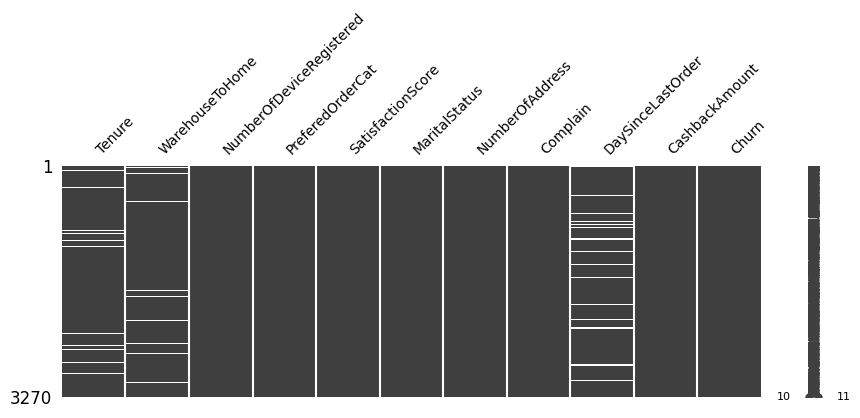

In [31]:
# identify missing data pattern using matrix plot
msn.matrix(df, figsize=(10,3), fontsize=10)

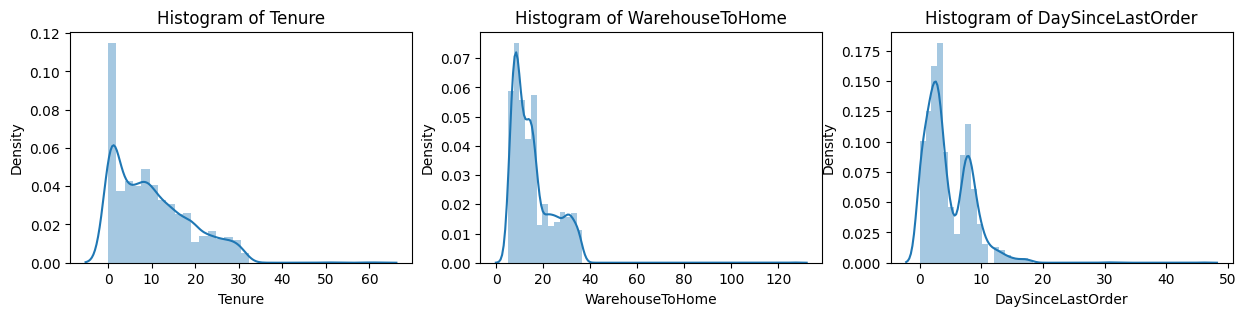

In [32]:
# plot distribution of attributes that contains missing values
missing_val_cols = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']
numerical_data  = df[missing_val_cols]

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

axes = axes.flatten()

for i, column in enumerate(numerical_data.columns):
    sns.distplot(numerical_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

plt.show()

Since those three columns are not normally distributed, we'll fill the missing values with the median.

In [33]:
# fill missing value with median
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

## **3.3. Handling Outliers**

In this step, we will identify and handle outliers to reduce noise and improve robustness, thereby enhancing model performance.

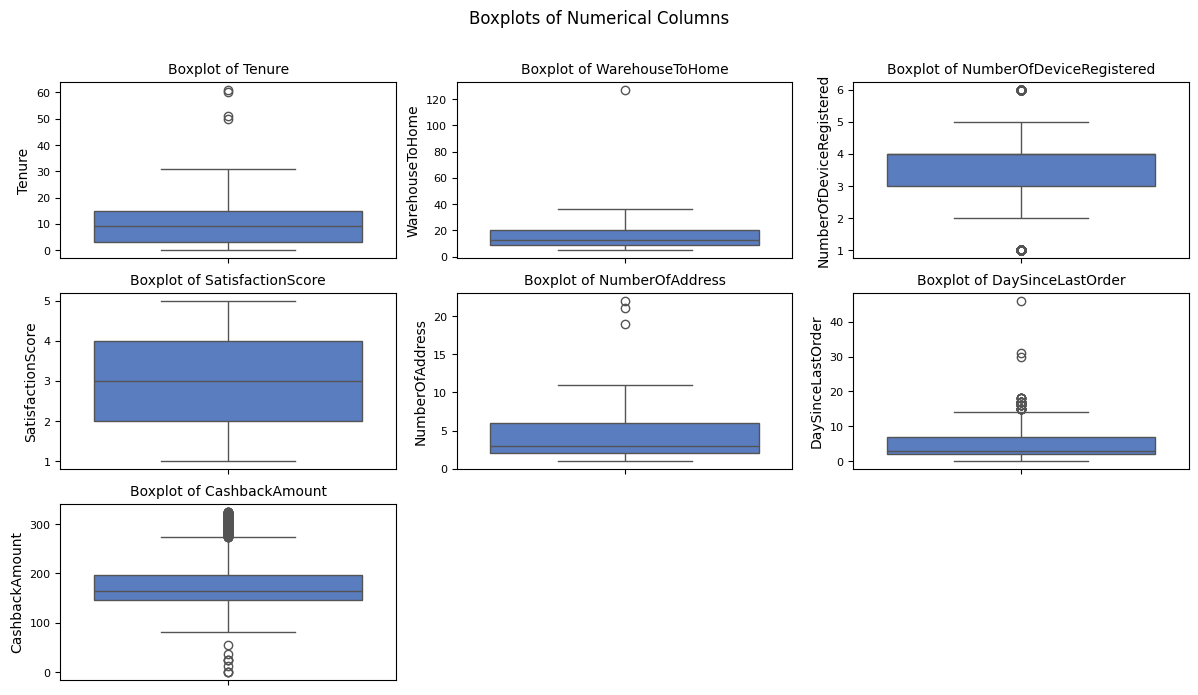

In [34]:
numerical_cols = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 
                'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']

num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 7))

plt.rcParams.update({'font.size': 7})

for i, column in enumerate(numerical_cols):
    row, col = divmod(i, 3)
    sns.boxplot(y=df[column], ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'Boxplot of {column}', fontsize=10)
    axes[row, col].tick_params(axis='y', labelsize=8)
    axes[row, col].set_ylabel(column, fontsize=10)
    axes[row, col].grid(False)
if num_cols % 3 != 0:
    for j in range(num_cols, num_rows * 3):
        fig.delaxes(axes.flatten()[j])

fig.suptitle('Boxplots of Numerical Columns', fontsize=12)

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

From the boxplots above, we identified statistical outliers in columns:
- Tenure
- WarehouseToHome
- NumberOfDeviceRegistered
- NumberOfAddress
- DaySinceLastOrder
- CashbackAmount

Now lets see number of outliers per columns:

In [35]:
outlier_counts = {}

for column_name in numerical_cols:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + IQR * 1.5
    lower = Q1 - IQR * 1.5

    outliers_count = df[(df[column_name] <= lower) | (df[column_name] >= upper)].shape[0]
    outlier_counts[column_name] = outliers_count

pd.Series(outlier_counts, name='Outlier Counts')

Tenure                        4
WarehouseToHome               1
NumberOfDeviceRegistered    226
SatisfactionScore             0
NumberOfAddress               3
DaySinceLastOrder            40
CashbackAmount              253
Name: Outlier Counts, dtype: int64

Here, the most notable extreme values are observed in `Tenure`, `WarehouseToHome`, and `NumberOfAddress`, which, based on the box plot, deviate significantly from the rest of the observations. Let's remove those.

In [36]:
# Define function to remove outliers
def handle_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + IQR * 1.5
    lower = Q1 - IQR * 1.5

    new_df = df[ (df[column_name] > lower) & (df[column_name] < upper) ]

    return new_df

In [37]:
# Removing outliers for Tenure and WarehouseToHome attributes
cols_outliers = ['Tenure', 'WarehouseToHome', 'NumberOfAddress']

for col in cols_outliers:
    df = handle_outliers(df , col)

# **4. Exploratory Data Analysis (EDA)**

In this section, we'll conduct a quick exploratory data analysis to identify the most influential predictors of customer churn, which will later be examined in our machine learning model explanations.

In [38]:
churn_counts = df['Churn'].value_counts()

total_customers = df.shape[0]
churn_percentages = (churn_counts / total_customers) * 100
churn_percentages = churn_percentages.round(2)

df_churn_counts = pd.DataFrame({'Churn Status': churn_counts.index, 'Count': churn_counts, 'Percentage': churn_percentages})
df_churn_counts.reset_index(drop=True, inplace=True)
# Create DataFrame to display counts and percentages
df_churn_counts

,Churn Status,Count,Percentage
0,0,2729,83.66
1,1,533,16.34


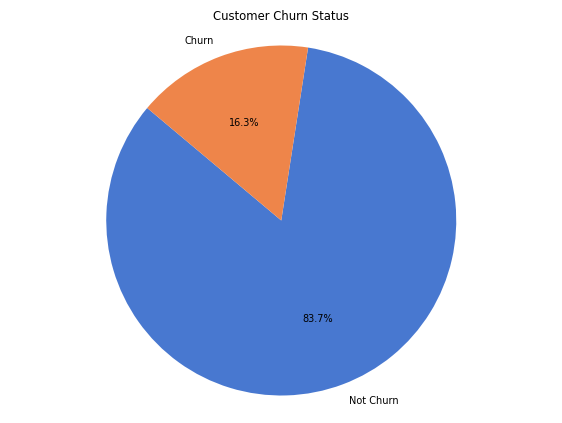

In [39]:
colors = sns.color_palette('muted')

plt.figure(figsize=(7, 5))
plt.pie(df_churn_counts['Count'], labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Customer Churn Status')
plt.axis('equal')
plt.show()

The pie chart illustrates the distribution of customer churn status in the dataset:

- **Not Churn**: 83.7%
- **Churn**: 16.3%

This indicates that 16.3% of customers in the dataset have churned, while 83.7% have not churned.


#### **Numerical Attributes**

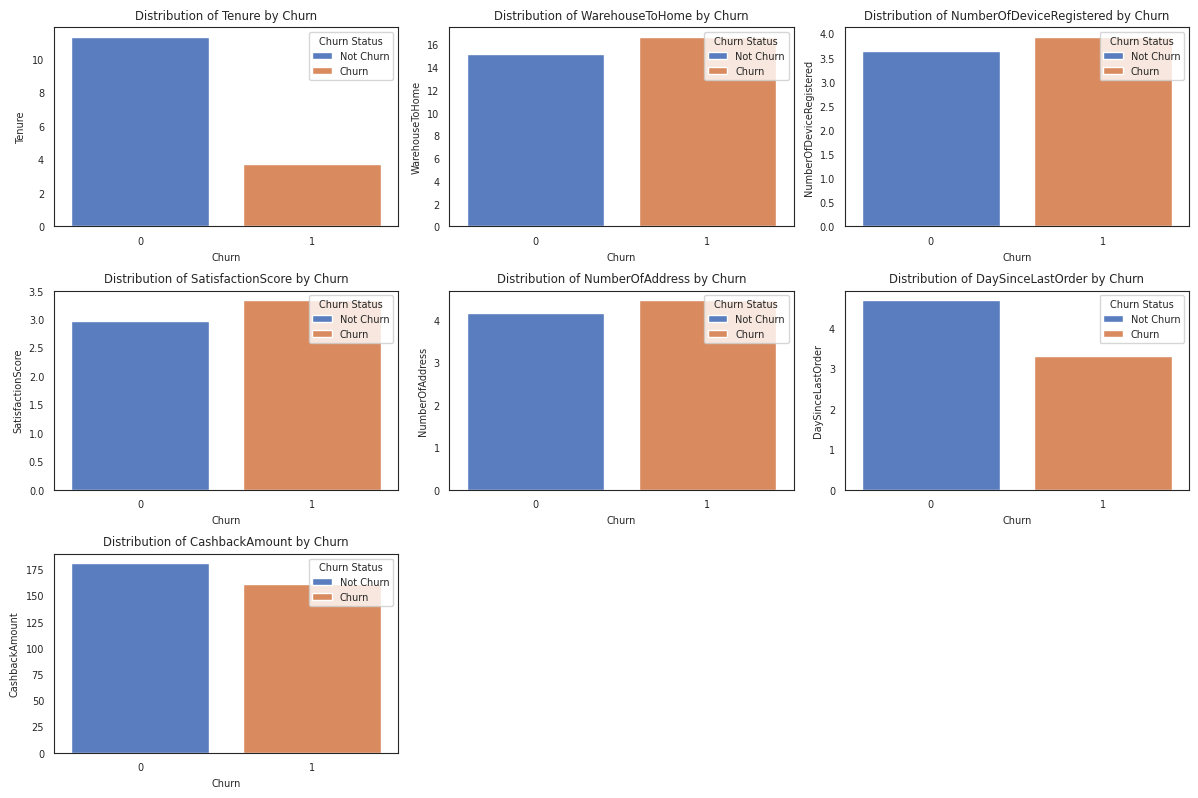

In [40]:
sns.set_style('white')

features = [
    'Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
    'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',
    'CashbackAmount'
]

plt.figure(figsize=(12, 8))

palette = sns.color_palette('muted', n_colors=2)

plotnumber = 1

for feature in features:
    ax = plt.subplot(3, 3, plotnumber)
    sns.barplot(data=df, x='Churn', y=feature, hue='Churn', palette=palette, errorbar=None)
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} by Churn')
    plt.legend(title='Churn Status', labels=['Not Churn', 'Churn'])
    plotnumber += 1
    plt.tight_layout()

plt.show()

In [41]:
df.groupby('Churn')[[
    'Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
    'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',
    'CashbackAmount'
]].mean()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,DaySinceLastOrder,CashbackAmount
Churn,,,,,,,
0,11.31550,15.119458,3.628802,2.961524,4.157567,4.690729,180.658032
1,3.69606,16.666041,3.930582,3.333959,4.470919,3.296435,160.583865


From the plots of numerical attributes above and their averages based on churning status, it is evident that **Tenure** stands out as the primary factor influencing customer churn rates. Customers with an average tenure of 11.3 years are less likely to churn, whereas those with a tenure below 4 years are at higher risk of churning.

If we break it down further, we can see more detailed information as follows:

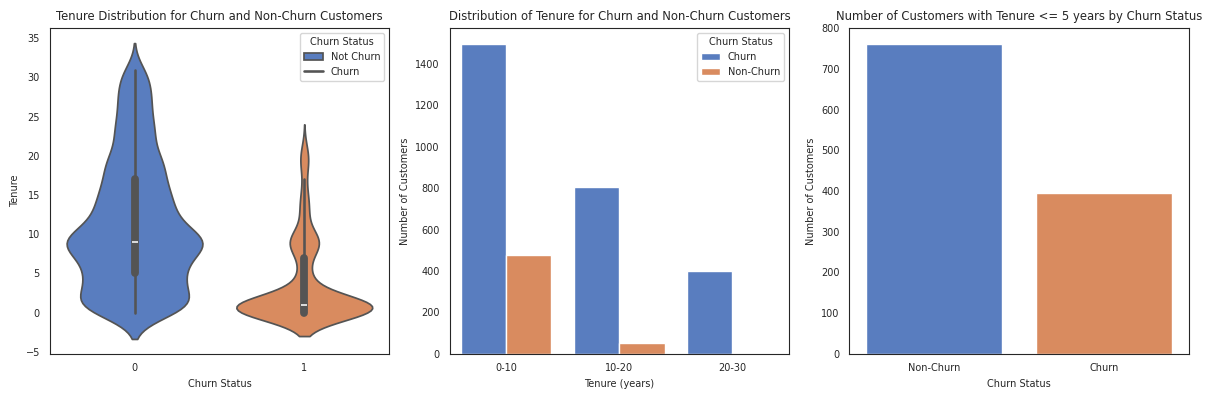

In [42]:
sns.set_style('white')
palette = sns.color_palette('muted', n_colors=2)

bins = [0, 10, 20, 30]
labels = ['0-10', '10-20', '20-30']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# tenure distribution using violin plot 
sns.violinplot(x='Churn', y='Tenure', data=df, palette=palette, ax=axes[0])
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Tenure')
axes[0].set_title('Tenure Distribution for Churn and Non-Churn Customers')
axes[0].legend(title='Churn Status', labels=['Not Churn', 'Churn'])


# binned tenure distribution
sns.countplot(x=pd.cut(df['Tenure'], bins=bins, labels=labels, include_lowest=True), hue='Churn', data=df, palette=palette, ax=axes[1])
axes[1].set_xlabel('Tenure (years)')
axes[1].set_ylabel('Number of Customers')
axes[1].set_title('Distribution of Tenure for Churn and Non-Churn Customers')
axes[1].legend(title='Churn Status', labels=['Churn', 'Non-Churn'])


# tenure less than equal to 5 years distribution
df_filtered = df[df['Tenure'] <= 5]

churn_counts = df_filtered['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

sns.barplot(x='Churn', y='Count', data=churn_counts, palette=palette)
axes[2].set_xlabel('Churn Status')
axes[2].set_ylabel('Number of Customers')
axes[2].set_title('Number of Customers with Tenure <= 5 years by Churn Status')
axes[2].set_xticks(ticks=[0, 1], labels=['Non-Churn', 'Churn'])

plt.tight_layout()
plt.show()

The violin plot on the left shows that customers who churn have a lower median tenure than those who don't. Most non-churning customers have a tenure of around 9 years, while churning customers have a tenure of around 3 years.

On the center, we binned the data, and from the chart, we can derive that customers who stay loyal to the e-commerce platform for over 10 years are less likely to churn. Based on this insight, we should focus on customers with less than 10 years of tenure, implementing strategies to encourage their loyalty and help them become stable, long-term customers.

On the right is the plot of the total customer count with respect to churn status. The number of customers who churn is half of those who do not churn. Based on business objectives, this number should be considered when applying treatments to reduce churn.

#### **Categorical Attributes**

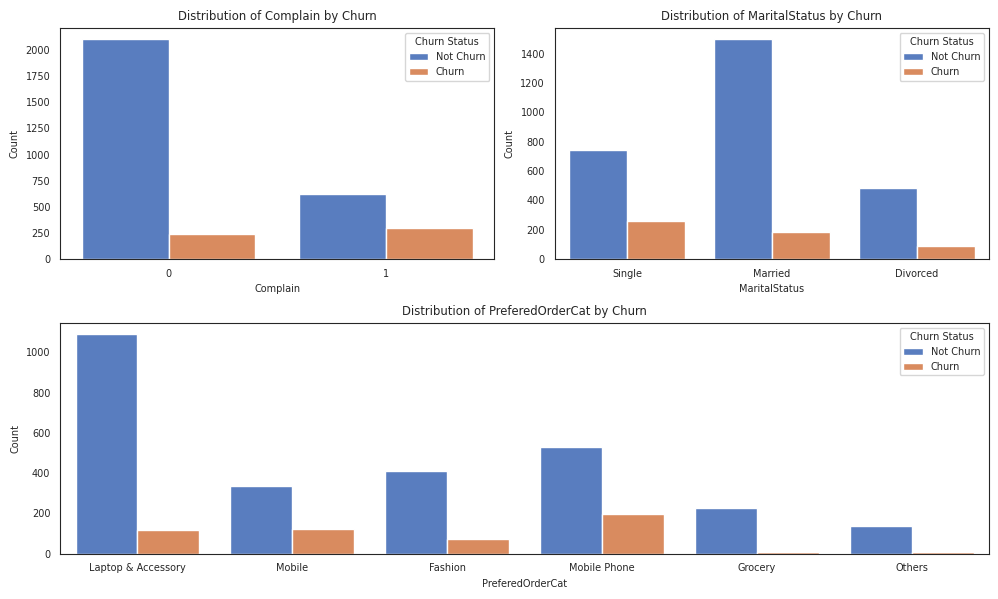

In [43]:
sns.set_style('white')

features = ['Complain', 'MaritalStatus', 'PreferedOrderCat']

plt.figure(figsize=(10, 6))

palette = sns.color_palette('muted', n_colors=2)

plotnumber = 1

for feature in features:
    if feature == 'PreferedOrderCat':
        ax = plt.subplot(2, 1, 2)
    else:
        ax = plt.subplot(2, 2, plotnumber)
    
    sns.countplot(data=df, x=feature, hue='Churn', palette=palette)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} by Churn')
    plt.legend(title='Churn Status', labels=['Not Churn', 'Churn'])
    plotnumber += 1
    plt.tight_layout()

plt.show()

From the plots of categorical attributes above, we can summarize as follows:
- Regarding the **Complain** attribute, users who do not leave a complaint can be assumed to be satisfied and less likely to churn.
- Regarding the **MaritalStatus** attribute, the majority of customers are married. From the observations, married customers tend to exhibit relatively higher loyalty.
- Regarding the **PreferredOrderCat** attribute, the majority of purchases are made in the Laptop & Accessory category. Customers who buy from this category also show a lower tendency to churn. 

# **5. Feature Engineering**

## **5.1. Data Transformation** 

### **5.1.1. Data Splitting**

Before transforming the data, let's split it into training and testing sets.

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis = 1)
y = df['Churn']

We'll split the data into an 80:20 ratio for training and testing, respectively, and define a `random_state` for result consistency and reproducibility.

In [45]:
# Define constant for random state
RANDOM_STATE = 0

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state = RANDOM_STATE
)

### **5.1.2. Data Encoding and Normalization**

Column Treatments:

1. Categorical Columns: For `PreferedOrderCat` and `MaritalStatus`, we will encode them using **BinaryEncoder**.
2. Numerical Columns: For `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `NumberOfAddress`, `DaySinceLastOrder`, and `CashbackAmount`, we will apply normalization using **MinMaxScaler**.
3. Remainder Columns: For `NumberOfDeviceRegistered`, `SatisfactionScore` and `Complain`, we will leave them as they are.

In [46]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder

numerical_cols = ['Tenure', 'WarehouseToHome', 'NumberOfAddress',
    'DaySinceLastOrder', 'CashbackAmount']

transformer = ColumnTransformer([
    ('binary', BinaryEncoder(), ['PreferedOrderCat', 'MaritalStatus']),
], remainder='passthrough')

scaler = MinMaxScaler()

Applying column transformer:

In [47]:
transformer.fit_transform(X_train)

array([[  0.  ,   0.  ,   1.  , ...,   0.  ,   8.  , 178.23],
       [  0.  ,   1.  ,   0.  , ...,   0.  ,   3.  , 161.69],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,   1.  , 266.06],
       ...,
       [  1.  ,   0.  ,   0.  , ...,   0.  ,   4.  , 192.25],
       [  0.  ,   1.  ,   0.  , ...,   0.  ,   3.  , 150.76],
       [  1.  ,   0.  ,   1.  , ...,   0.  ,   2.  , 126.1 ]])

Here is the list of columns generated by the transformation process:

In [48]:
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

print(f"Number of features: {len(list_features)}")
list_features

Number of features: 13


['PreferedOrderCat_0',
 'PreferedOrderCat_1',
 'PreferedOrderCat_2',
 'MaritalStatus_0',
 'MaritalStatus_1',
 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

# **6. Model Selection and Training**

## **6.1. Defining Models for Benchmarking**

We'll use the following models to find the most suitable with the best performance:

**Base Models:**
1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbors (KNN)

**Ensemble Model - Various Types:**
1. Soft Voting of Logistic Regression, Decision Tree, and KNN
2. Stacked Method of Logistic Regression, Decision Tree, and KNN

**Ensemble Model - Same Type (Bagging):**
1. Random Forest

**Ensemble Method - Same Type (Boosting):**
1. AdaBoost
2. XGBoost
3. Gradient Boosting

### **6.2. Models Initiation**

In [49]:
# import models
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, fbeta_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier


# Base models
logreg = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Ensemble models - Various Type (Soft Voting)
vc = VotingClassifier(estimators=[
    ('dtree', dtree),
    ('knn', knn),
    ('lr', logreg)
], voting='soft')

# Ensemble models - Various Type (Stacking)
sc = StackingClassifier(estimators=[ 
    ('dtc', dtree),
    ('knn', knn),
    ('lr', logreg)
])

# Ensemble models - Same Type (Bagging)
rf = RandomForestClassifier(random_state=RANDOM_STATE)

# Ensemble models - Same Type (Boosting)
ada = AdaBoostClassifier(random_state=RANDOM_STATE)
gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)
xgb = XGBClassifier(random_state=RANDOM_STATE, verbosity=0)

Defining a custom metric to list precision, recall, and F2-score:

In [50]:
from sklearn.metrics import fbeta_score, precision_recall_fscore_support

def get_custom_f2_metric(y_true, y_pred):
    # Calculate precision, recall, and support
    precision, recall, _, support = precision_recall_fscore_support(y_true, y_pred)
    
    # Calculate F2-scores
    f2_scores = fbeta_score(y_true, y_pred, beta=2, average=None)
    f2_score_avg = fbeta_score(y_true, y_pred, beta=2, average='weighted')
    
    # Calculate weighted averages
    precision_avg = round((precision * support).sum() / support.sum(), 2)
    recall_avg = round((recall * support).sum() / support.sum(), 2)
    support_avg = int(support.sum())

    # Round scores for readability
    f2_scores_rounded = [round(score, 2) for score in f2_scores]
    precision_rounded = [round(prec, 2) for prec in precision]
    recall_rounded = [round(rec, 2) for rec in recall]
    support_rounded = [int(sup) for sup in support]
    
    # Create a DataFrame to display the scores
    scores_list = list(zip(precision_rounded, recall_rounded, f2_scores_rounded, support_rounded)) + [
        (precision_avg, recall_avg, round(f2_score_avg, 2), support_avg)]
    
    df_scores = pd.DataFrame(scores_list, columns=['precision', 'recall', 'f2-score', 'support'], 
        index=[0, 1, 'weighted avg'])
    
    return df_scores


## **6.3. Finding the Best Model**

Next, we will determine the model with the best performance through cross-validation, using the F2-score to measure performance, as stated in our objective.

In [51]:
f2_scorer = make_scorer(fbeta_score, beta=2)

models = [dtree, knn, logreg, vc, sc, rf, ada, gbc, xgb]
model_names = ['DTree', 'KNN', 'LogReg', 'VotingClf', 'StackClf', 'RandForest', 'ADA', 'GBC', 'XGB']

train_score = []
std = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for model in models:
    estimator = Pipeline([
      ('transformer', transformer),
      ('scaler', scaler),
      ('model', model)
    ])
    
    model_cv = cross_val_score(estimator, X_train, y_train, cv=cv, scoring=f2_scorer, error_score='raise')
    
    train_score.append(model_cv.mean())
    std.append(model_cv.std())

In [52]:
benchmark_model_train = pd.DataFrame({
    'model': model_names,
    'train_score': train_score,
    'std': std
}).sort_values(by='train_score',ascending=False)

benchmark_model_train

,model,train_score,std
8,XGB,0.635677,0.070930
0,DTree,0.626453,0.063340
6,ADA,0.589543,0.039658
7,GBC,0.568059,0.064838
5,RandForest,0.565738,0.070951
4,StackClf,0.545743,0.043230
3,VotingClf,0.537805,0.044049
2,LogReg,0.444599,0.015179
1,KNN,0.430741,0.027856


Model benchmarking on test dataset:

In [53]:
# check the best benchmark model on test
test_score = []

for i in models:
    model_pipeline = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    model_pipeline.fit(X_train, y_train)

    y_pred_test = model_pipeline.predict(X_test)

    f2 = fbeta_score(y_test, y_pred_test, beta=2)
    test_score.append(f2)

In [54]:
benchmark_model_test = pd.DataFrame({
    'model': model_names,
    'test_score': test_score
}).sort_values(by='test_score', ascending=False)

benchmark_model_test

,model,test_score
8,XGB,0.700000
5,RandForest,0.652985
6,ADA,0.651769
7,GBC,0.650558
4,StackClf,0.634328
0,DTree,0.622807
3,VotingClf,0.602637
2,LogReg,0.493097
1,KNN,0.483871


Comparing the training and test scores

In [55]:
# combine and compare
benchmark_model = benchmark_model_train.set_index('model').join(benchmark_model_test.set_index('model'))
benchmark_model.drop('std', axis=1, inplace=True)
benchmark_model['diff'] = benchmark_model['test_score'] - benchmark_model['train_score']
benchmark_model['diff'] = benchmark_model['diff'].agg('abs')
benchmark_model.sort_values(by='test_score', ascending=False)

,train_score,test_score,diff
model,,,
XGB,0.635677,0.700000,0.064323
RandForest,0.565738,0.652985,0.087247
ADA,0.589543,0.651769,0.062226
GBC,0.568059,0.650558,0.082498
StackClf,0.545743,0.634328,0.088585
DTree,0.626453,0.622807,0.003646
VotingClf,0.537805,0.602637,0.064831
LogReg,0.444599,0.493097,0.048498
KNN,0.430741,0.483871,0.053130


Based on the model benchmarking above, we can conclude that the best classifier for our dataset is XGBoost with an F2-score of 70%, and the most stable is Decision Tree. We will proceed with our modeling using these two algorithms.

# **7. Model Evaluation** 

## **7.1. Apply Best Model**

### **7.1.1 XGBoost**

In [56]:
model = Pipeline([
    ('transformer', transformer),
    ('estimator', xgb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(get_custom_f2_metric(y_test, y_pred))

              precision  recall  f2-score  support
0                  0.94    0.95      0.95      541
1                  0.75    0.69      0.70      112
weighted avg       0.91    0.91      0.91      653


### **7.1.2. Decision Tree**

In [57]:
model = Pipeline([
    ('transformer', transformer),
    ('estimator', dtree)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(get_custom_f2_metric(y_test, y_pred))

              precision  recall  f2-score  support
0                  0.92    0.91      0.91      541
1                  0.59    0.63      0.62      112
weighted avg       0.87    0.86      0.86      653


## **7.2. Improving Model Performance**

### **7.2.1. Additional Feature Selection: Recursive Feature Elimination (RFE)**

Recursive Feature Elimination (RFE) is a feature selection algorithm crucial in machine learning. It operates on datasets structured like spreadsheets, with rows and columns.

Feature selection involves choosing the most pertinent subset of features (columns) from a dataset. By reducing the number of features, machine learning algorithms can operate more efficiently, with reduced time and space complexity, leading to enhanced effectiveness. Irrelevant input features can mislead certain algorithms, potentially diminishing predictive performance. [Reference](https://machinelearningmastery.com/rfe-feature-selection-in-python/), [Scikitlearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [58]:
# get all feature names
encoded_cols = list(transformer.transformers_[0][1].get_feature_names_out())
normalized_cols = list(transformer.transformers_[1][1].get_feature_names_out())

all_feature_names = encoded_cols + normalized_cols

In [59]:
# implement RFE
from sklearn.feature_selection import RFE

results = []

for n_features in range(10, 14):
    rfe = RFE(estimator=xgb, n_features_to_select=n_features)

    estimator = Pipeline([
        ('transformer', transformer),
        ('rfe', rfe),
        ('model', xgb)
    ])

    estimator.fit(X_train, y_train)

    # get selected feature based on ranking
    selected_features = [feature for feature, rank in zip(all_feature_names, rfe.ranking_) if rank == 1]
    dropped_features = [feature for feature, rank in zip(all_feature_names, rfe.ranking_) if rank != 1]

    X_train_selected = pd.DataFrame(
        transformer.transform(X_train), 
        columns=all_feature_names
    )[selected_features]

    estimator = Pipeline([('estimator', xgb)])

    mean_f2_score = cross_val_score(
        estimator,
        X_train_selected,
        y_train, 
        cv=cv, 
        scoring=f2_scorer,
        error_score='raise'
    ).mean()

    results.append({
        'n_features': n_features,
        'selected_features': selected_features,
        'dropped_features': dropped_features,
        'mean_f2_score_cv': mean_f2_score
    })

results_df = pd.DataFrame(results)
results_df.sort_values('mean_f2_score_cv', ascending=False)


,n_features,selected_features,dropped_features,mean_f2_score_cv
3,13,"[PreferedOrderCat_0, PreferedOrderCat_1, PreferedOrderCat_2, MaritalStatus_0, MaritalStatus_1, Tenure, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain, DaySinceLastOrder, CashbackAmount]",[],0.634173
0,10,"[PreferedOrderCat_0, PreferedOrderCat_2, MaritalStatus_0, MaritalStatus_1, Tenure, SatisfactionScore, NumberOfAddress, Complain, DaySinceLastOrder, CashbackAmount]","[PreferedOrderCat_1, WarehouseToHome, NumberOfDeviceRegistered]",0.630039
1,11,"[PreferedOrderCat_0, PreferedOrderCat_2, MaritalStatus_0, MaritalStatus_1, Tenure, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain, DaySinceLastOrder, CashbackAmount]","[PreferedOrderCat_1, WarehouseToHome]",0.624826
2,12,"[PreferedOrderCat_0, PreferedOrderCat_1, PreferedOrderCat_2, MaritalStatus_0, MaritalStatus_1, Tenure, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain, DaySinceLastOrder, CashbackAmount]",[WarehouseToHome],0.606058


Based on the cross-validation scores observed, the highest score was achieved with observations that utilized all available features, indicating no need to eliminate any.

### **7.2.2. Implementing the Best Resampling Method**

In [60]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss


classifiers = [
    ('XGB', xgb),
    ('DTree', dtree)
]

RUS = RandomUnderSampler(random_state=RANDOM_STATE)
ROS = RandomOverSampler(random_state=RANDOM_STATE)
SMOTE = SMOTE(random_state=RANDOM_STATE)
NM = NearMiss()

resampling_methods = [
    ('SMOTE', SMOTE),
    ('ROS', ROS),
    ('RUS', RUS),
    ('NM', NM)
]

model_score = []
f2_score = []
std = []
resampling_names_with_estimators = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for clf_name, clf in classifiers:
    for res_name, res_method in resampling_methods:
        model_pipe = ImbPipeline([
            ('transformer', transformer),
            ('resampling', res_method),
            ('estimator', clf)
        ])
        
        model_cv = cross_val_score(
            model_pipe, 
            X_train, 
            y_train, 
            cv=cv, 
            scoring=f2_scorer
        )
        
        model_score.append(model_cv)
        f2_score.append(model_cv.mean())
        std.append(model_cv.std())
        resampling_names_with_estimators.append(f"{clf_name}-{res_name}")

f2_scores = pd.DataFrame({
    'method': resampling_names_with_estimators,
    'f2-score': f2_score,
    'std': std
}).sort_values(by='f2-score', ascending=False)

f2_scores

,method,f2-score,std
2,XGB-RUS,0.719719,0.021741
1,XGB-ROS,0.684970,0.050019
6,DTree-RUS,0.652984,0.023434
0,XGB-SMOTE,0.632075,0.036559
4,DTree-SMOTE,0.586014,0.020628
5,DTree-ROS,0.558713,0.055134
3,XGB-NM,0.535831,0.027743
7,DTree-NM,0.511295,0.021550


From the resampling comparison, we can choose XGBoost paired with Random Under Sampling and Decision Tree paired with Random Under Sampling.

##### **a. XGBoost with Random Under Sampling**

In [61]:
model = ImbPipeline([
    ('transformer', transformer),
    ('resampling', RUS),
    ('estimator', xgb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(get_custom_f2_metric(y_test, y_pred))

              precision  recall  f2-score  support
0                  0.97    0.84      0.86      541
1                  0.53    0.89      0.78      112
weighted avg       0.90    0.85      0.85      653


##### **b. Decision Tree with Random Under Sampling**

In [62]:
model = ImbPipeline([
    ('transformer', transformer),
    ('resampling', RUS),
    ('estimator', dtree)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(get_custom_f2_metric(y_test, y_pred))

              precision  recall  f2-score  support
0                  0.97    0.79      0.82      541
1                  0.46    0.87      0.73      112
weighted avg       0.88    0.80      0.80      653


### **7.2.3. Implementing Cost-Sensitive Learning**

##### **a. Weighted XGBoost**

In [63]:
class_counts = y_train.value_counts()
count_class_0 = class_counts[0]
count_class_1 = class_counts[1]

print(f"Count of class 0: {count_class_0}")
print(f"Count of class 1: {count_class_1}")

Count of class 0: 2188
Count of class 1: 421


In [64]:
scale_pos_weight = count_class_0 / count_class_1
print(scale_pos_weight)

5.197149643705464


In [65]:
weighted_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=RANDOM_STATE, verbosity=0)

model = Pipeline([
    ('transformer', transformer),
    ('estimator', weighted_xgb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(get_custom_f2_metric(y_test, y_pred))

              precision  recall  f2-score  support
0                  0.95    0.92      0.93      541
1                  0.68    0.78      0.76      112
weighted avg       0.91    0.90      0.90      653


##### **b. Weighted Decision Tree**

In [66]:
class_weights = {0: 1, 1: 5}

weighted_dtree = DecisionTreeClassifier(class_weight=class_weights, random_state=RANDOM_STATE)

model = Pipeline([
    ('transformer', transformer),
    ('estimator', dtree)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(get_custom_f2_metric(y_test, y_pred))

              precision  recall  f2-score  support
0                  0.92    0.91      0.91      541
1                  0.59    0.63      0.62      112
weighted avg       0.87    0.86      0.86      653


### **7.3.4. Applying Hyperparameter Tuning**

#### **1. XGBoost**

In [67]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

f2_scorer = make_scorer(fbeta_score, beta=2)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

hyperparameter_space_xgb = {
    'model__booster': ['gbtree', 'gblinear', 'dart'],
    'model__learning_rate': uniform(0.01, 0.3),
    'model__max_depth': randint(3, 10),
    'model__min_child_weight': randint(1, 10),
    'model__subsample': uniform(0.5, 0.5),
    'model__colsample_bytree': uniform(0.3, 0.7),
    'model__reg_lambda': uniform(0, 2),
    'model__reg_alpha': uniform(0, 2),
    'model__gamma': uniform(0, 2),
    'model__n_estimators': randint(50, 200)
}


##### **1.a. XGBoost with Random Under Sampling**

In [68]:
estimator = ImbPipeline([
    ('transformer', transformer),
    ('resampling', ROS),
    ('model', xgb)
])

random_search_xgb_rus = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=hyperparameter_space_xgb,
    cv=skf,
    scoring=f2_scorer,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    n_iter=30,
    verbose=0
)

In [69]:
random_search_xgb_rus.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('resampling',
                                              RandomOverSampler(random_state=0)),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbac...
                                        'model__reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cabf29f23e0>,
                                        'model__reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cabe8363550>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cabe8361a50>},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [70]:
best_score_xgb_rus = random_search_xgb_rus.best_score_
best_params_xgb_rus = random_search_xgb_rus.best_params_
print("Best Score:", best_score_xgb_rus)
print("Best Hyperparameters:", best_params_xgb_rus)

Best Score: 0.7399093295727518
Best Hyperparameters: {'model__booster': 'dart', 'model__colsample_bytree': np.float64(0.6956322066234126), 'model__gamma': np.float64(1.73020512261077), 'model__learning_rate': np.float64(0.16269068820010435), 'model__max_depth': 9, 'model__min_child_weight': 2, 'model__n_estimators': 86, 'model__reg_alpha': np.float64(1.8585923951524281), 'model__reg_lambda': np.float64(0.6371379049026473), 'model__subsample': np.float64(0.8337051899818408)}


In [71]:
y_pred = random_search_xgb_rus.best_estimator_.predict(X_test)
print(get_custom_f2_metric(y_test, y_pred))

              precision  recall  f2-score  support
0                  0.97    0.91      0.92      541
1                  0.66    0.86      0.81      112
weighted avg       0.92    0.90      0.90      653


##### **1.b. Weighted XGBoost**

In [72]:
estimator = Pipeline([
    ('transformer', transformer),
    ('model', weighted_xgb)
])

random_search_weighted_xgb = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=hyperparameter_space_xgb,
    cv=skf,
    scoring=f2_scorer,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    n_iter=30,
    verbose=0
)


In [73]:
random_search_weighted_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=N...
                                        'model__reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cabf29f23e0>,
                                        'model__reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cabe8363550>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cabe8361a50>},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [74]:
best_score_weighted_xgb = random_search_weighted_xgb.best_score_
best_params_weighted_xgb = random_search_weighted_xgb.best_params_
print("Best Score:", best_score_weighted_xgb)
print("Best Hyperparameters:", best_params_weighted_xgb)

Best Score: 0.7388129270838808
Best Hyperparameters: {'model__booster': 'gbtree', 'model__colsample_bytree': np.float64(0.763768806865031), 'model__gamma': np.float64(0.027143271224219667), 'model__learning_rate': np.float64(0.19685382866400084), 'model__max_depth': 7, 'model__min_child_weight': 3, 'model__n_estimators': 98, 'model__reg_alpha': np.float64(1.9529189300267915), 'model__reg_lambda': np.float64(0.9373024032954032), 'model__subsample': np.float64(0.9883805440951685)}


In [75]:
y_pred = random_search_weighted_xgb.best_estimator_.predict(X_test)
print(get_custom_f2_metric(y_test, y_pred))

              precision  recall  f2-score  support
0                  0.97    0.92      0.93      541
1                  0.70    0.86      0.82      112
weighted avg       0.92    0.91      0.91      653


#### **2. Decision Tree**

In [76]:
dtree = DecisionTreeClassifier(random_state=RANDOM_STATE)

class_weights = {0: 1, 1: 5}
weighted_dtree = DecisionTreeClassifier(class_weight=class_weights, random_state=RANDOM_STATE)


hyperparameter_space_dtree = {
    'model__criterion': ['gini', 'entropy'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': randint(3, 10),
    'model__min_samples_split': randint(2, 20),
    'model__min_samples_leaf': randint(1, 20),
    'model__max_features': ['auto', 'sqrt', 'log2', None]
}

##### **2.a. Decision Tree with Random Under Sampling**

In [77]:
estimator = ImbPipeline([
    ('transformer', transformer),
    ('resampling', RUS),
    ('model', dtree)
])

random_search_dtree_rus = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=hyperparameter_space_dtree,
    cv=skf,
    scoring=f2_scorer,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    n_iter=30,
    verbose=0
)

In [78]:
random_search_dtree_rus.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('resampling',
                                              RandomUnderSampler(random_state=0)),
                                             ('model',
                                              DecisionTreeClassifier(random_state=0))]),
                   n_iter=...
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2', None],
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cabf29f0d00>,
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cac00809450>,
                                        'model__splitter': ['best', 'random']},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [79]:
best_score_dtree_rus = random_search_dtree_rus.best_score_
best_params_dtree_rus = random_search_dtree_rus.best_params_
print("Best Score:", best_score_dtree_rus)
print("Best Hyperparameters:", best_score_dtree_rus)

Best Score: 0.6769502432755765
Best Hyperparameters: 0.6769502432755765


In [80]:
y_pred = random_search_dtree_rus.best_estimator_.predict(X_test)
print(get_custom_f2_metric(y_test, y_pred))

              precision  recall  f2-score  support
0                  0.96    0.86      0.88      541
1                  0.55    0.85      0.76      112
weighted avg       0.89    0.85      0.86      653


##### **2.b. Weighted Decision Tree**

In [81]:
estimator = Pipeline([
    ('transformer', transformer),
    ('model', weighted_dtree)
])

random_search_weighted_dtree = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=hyperparameter_space_dtree,
    cv=skf,
    scoring=f2_scorer,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    n_iter=30,
    verbose=0
)

In [82]:
random_search_weighted_dtree.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('model',
                                              DecisionTreeClassifier(class_weight={0: 1,
                                                                                   1: 5},
                                                                     random_state=0))]),
                   n_iter=30, n_jobs=-1,
                   param_distribu...
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2', None],
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cabf29f0d00>,
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cac00809450>,
                                        'model__splitter': ['best', 'random']},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [83]:
best_score_weighted_dtree = random_search_weighted_dtree.best_score_
best_params_weighted_dtree = random_search_weighted_dtree.best_params_
print("Best Score:", best_score_weighted_dtree)
print("Best Hyperparameters:", best_params_weighted_dtree)

Best Score: 0.6883924338618186
Best Hyperparameters: {'model__criterion': 'gini', 'model__max_depth': 9, 'model__max_features': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 17, 'model__splitter': 'random'}


In [84]:
y_pred = random_search_weighted_dtree.best_estimator_.predict(X_test)
print(get_custom_f2_metric(y_test, y_pred))

              precision  recall  f2-score  support
0                  0.94    0.82      0.85      541
1                  0.47    0.76      0.68      112
weighted avg       0.86    0.81      0.82      653


### **7.3. Best Model**

Below is a comparison of the two best models, each using resampling and weighted techniques. From this, we can conclude that the Weighted XGBoost scored the best among the methods.

| Model                                         | F2-Score |
|-----------------------------------------------|----------|
| XGBoost with Random Under Sampling            | 0.77     |
| Weighted XGBoost                              | 0.82     |
| Decision Tree with Random Under Sampling      | 0.76     |
| Weighted Decision Tree                        | 0.68     |

##### Comparison of Weighted XGBoost Before and After Tuning

Next, we'll compare the performance of the Weighted XGBoost model before and after tuning.

In [85]:
weighted_xgb_model = Pipeline([
    ('transformer', transformer),
    ('estimator', weighted_xgb)
])

weighted_xgb_model.fit(X_train, y_train)
y_pred = weighted_xgb_model.predict(X_test)
print(f"f2-score: {fbeta_score(y_test, y_pred, beta=2)}")

f2-score: 0.7552083333333334


In [86]:
# after
xgb_model_tuning = random_search_weighted_xgb.best_estimator_

y_pred_xgb_tuning = xgb_model_tuning.predict(X_test)
print(f"f2-score: {fbeta_score(y_test, y_pred, beta=2)}")

f2-score: 0.7552083333333334


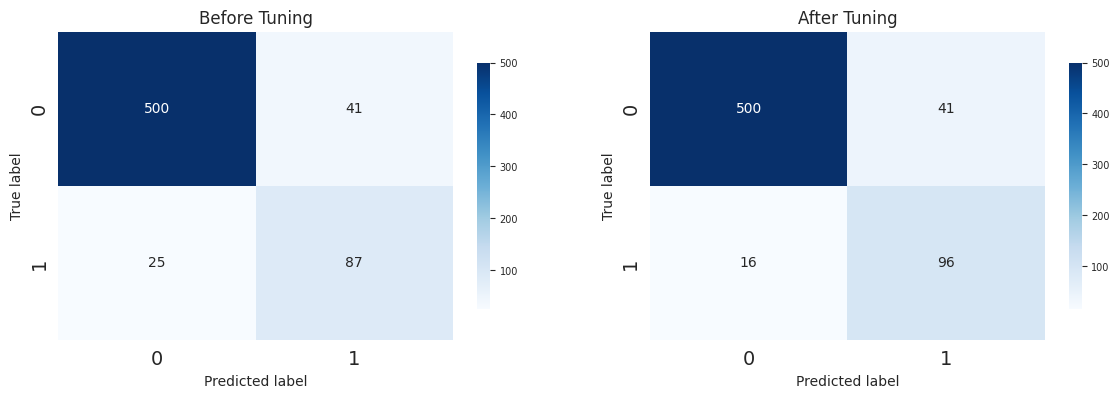

In [113]:
# Calculate confusion matrices
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred_xgb_tuning)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

titles = ['Before Tuning', 'After Tuning']

for ax, cm, title in zip(axes, [cm1, cm2], titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={"size": 10}, cbar_kws={"shrink": .8})
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Predicted label', fontsize=10)
    ax.set_ylabel('True label', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

As we can see from the confusion matrices above, after the tuning process and finding the best hyperparameters, the F2 score increased from 0.76 to 0.82, indicated by a significant decrease in the number of false negatives. Thus, this model is considered the best and final model for this experiment.


In [88]:
model_final = xgb_model_tuning

### **7.5. Model Explaination**

We'll use SHAP to explain the model because it's a model-agnostic technique applicable to any machine learning algorithm.

SHAP (SHapley Additive exPlanations) is a game-theoretic approach that explains the output of machine learning models. It connects optimal credit allocation with local explanations using classic Shapley values from game theory and their extensions. [SHAP documentation](https://pypi.org/project/shap/)

##### **7.5.1.  Initiate SHAP**

In [90]:
import shap

explainer = shap.Explainer(
    model_final[1].predict,
    model_final[0].transform(X_test),
)

shap_values = explainer(model_final[0].transform(X_test))

PermutationExplainer explainer: 654it [00:23, 17.23it/s]                         


##### **7.5.2. Feature Importance**

For determining feature importance, we utilize SHAP values due to their consistency and accuracy compared to conventional global feature importance measures.

> SHAP (SHapley Additive exPlanations) values provide a robust theoretical framework and efficient algorithmic approach for interpreting tree-based models like XGBoost's gradient boosting machines. [Reference](https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27)

> Mean absolute SHAP values are more theoretically rigorous, and relate to which features impact predictions most (which is usually what we're interested in). Conventional feature importances are measured in more abstract and algorithm-specific ways, and are determined by how much each feature improves the model's predictive performance. [Reference](https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/)

In [91]:
# Feature names
features = list(transformer.get_feature_names_out())

feature_names = ['_'.join(feature.split('_')[2:]) for feature in features]

df_features = pd.DataFrame({'Feature': feature_names})
df_features.index = [f"Feature {i}" for i in df_features.index]

df_features


,Feature
Feature 0,PreferedOrderCat_0
Feature 1,PreferedOrderCat_1
Feature 2,PreferedOrderCat_2
Feature 3,MaritalStatus_0
Feature 4,MaritalStatus_1
Feature 5,Tenure
Feature 6,WarehouseToHome
Feature 7,NumberOfDeviceRegistered
Feature 8,SatisfactionScore
Feature 9,NumberOfAddress


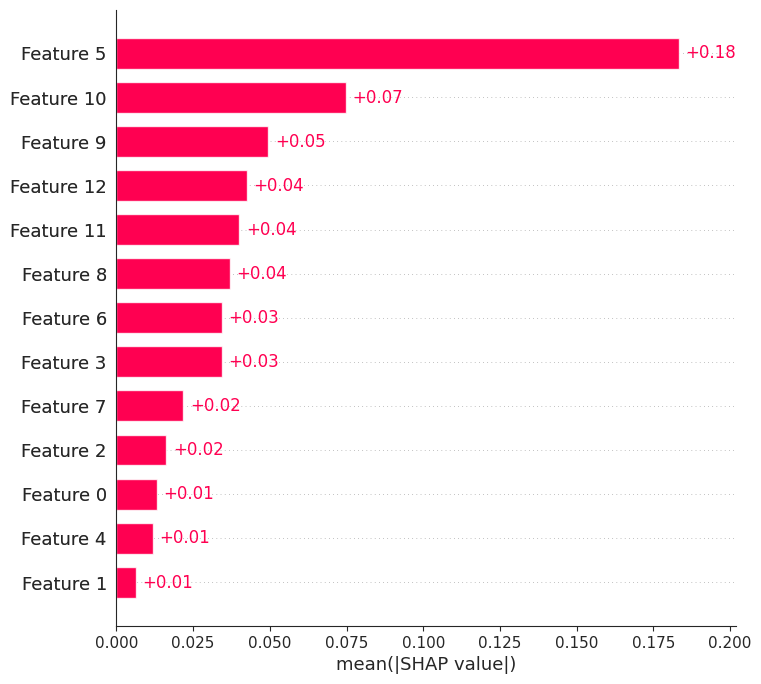

In [92]:
shap.plots.bar(shap_values, max_display=13)

Based on the relative magnitudes of the mean absolute SHAP values, **Tenure** (Feature 5) emerges as the most influential variable, contributing approximately 0.18 to each predicted outcome. Followed by **Complain** (Feature 10) and **Cashback Amount** (Feature 9), contributing about 0.07 and 0.05 respectively. In contrast, **PreferOrderCat** (Feature 1) appears less influential, contributing only around 0.01.

##### **7.5.3. Summary Plot**

The SHAP summary plot shows the overall importance of features, with a wider spread of SHAP values indicating higher importance. It also illustrates how features influence the model prediction, where red points represent higher feature values that generally increase the prediction.

In [93]:
X_train_trans = model_final.named_steps['transformer'].transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans, columns=list_features)

explainer = shap.TreeExplainer(
    model_final.named_steps['model'],
    data=X_train_trans,
    feature_perturbation='interventional',
    model_output='probability'
)

shap_values_summary = explainer.shap_values(X_train_trans)


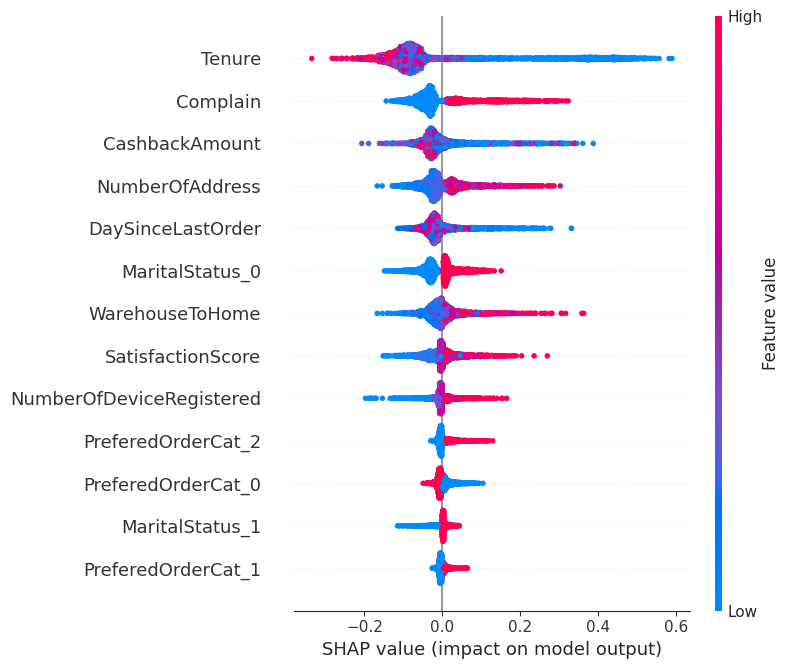

In [94]:
# summary plot fot model in train
shap.summary_plot(
    shap_values_summary,
    X_train_trans,
    feature_names=list_features
)

Key insights from this chart include:

- As expected customers with low tenure are more likely to churn compared to those with moderate or high tenure.
- Customers who submit complaints are also more likely to churn compared to those who do not submit complaints. 
- Saturated Cashback Amount values (between high and low) indicate significant influence on predictions, reflecting distinct user responses to different cashback levels.

##### **7.5.4. Local interpretability: explaining individual predictions**

In [95]:
# using first index for individual prediction
i = 0

print(f"Features:\n{X_test.iloc[i]}")
print(f"\nTarget:\n{y_test.iloc[i]}")

Features:
Tenure                               5.0
WarehouseToHome                     12.0
NumberOfDeviceRegistered               4
PreferedOrderCat            Mobile Phone
SatisfactionScore                      4
MaritalStatus                    Married
NumberOfAddress                        3
Complain                               0
DaySinceLastOrder                    3.0
CashbackAmount                    152.89
Name: 2470, dtype: object

Target:
0


##### **a. Bar Plot**

In [96]:
df_features

,Feature
Feature 0,PreferedOrderCat_0
Feature 1,PreferedOrderCat_1
Feature 2,PreferedOrderCat_2
Feature 3,MaritalStatus_0
Feature 4,MaritalStatus_1
Feature 5,Tenure
Feature 6,WarehouseToHome
Feature 7,NumberOfDeviceRegistered
Feature 8,SatisfactionScore
Feature 9,NumberOfAddress


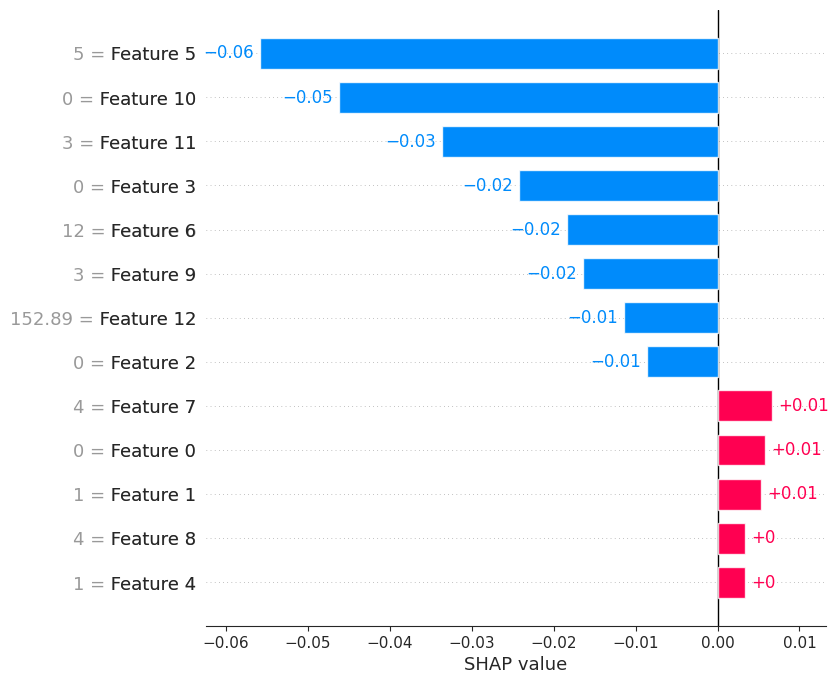

In [97]:
shap.plots.bar(shap_values[i], max_display=13)

The values quantify the amount and direction in which each variable impacts the likelihood of customer churn. Red bars correspond to input variables that push the model toward identifying churn = 0, while blue bars push the model toward identifying churn = 1.

Based on the item index 0 above, we observe that the majority of variables lean towards predicting churn = 0.

##### **b. Force Plot**

In [127]:
# Initiate force plot
shap.initjs()

In [128]:
def shap_plot(idx, model, dataset):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(dataset)
    return shap.force_plot(explainer.expected_value, shap_values[idx], dataset.iloc[idx])

# Preprocess X_test
X_test_preprocessed = pd.DataFrame(model_final['transformer'].transform(X_test), columns=list_features)

shap_plot(i, model_final['model'], X_test_preprocessed)


In a force plot, variables with SHAP values that 'push' the model towards a churn = 1 prediction appear on the left in red, while those that 'push' towards churn = 0 appear on the right in blue. Each variable's actual value is displayed alongside its name.

The force plot above provides a detailed breakdown of the primary influencers for a specific data record. Notably, variables such as Tenure and Complain are depicted with substantial arrows, indicating their significant impact on the model's prediction for this particular instance.

## **8. Cost Benefit Analysis** 

#### **Business Metric**

To measure the performance of the model predictions and their impact on business, we will use the following metrics:

**CAC (Customer Acquisition Cost)**: The amount spent to acquire new customers. This includes marketing, sales team costs, advertising, promotions, and other expenses related to attracting potential customers. It measures the efficiency of a company's customer acquisition strategy.

**CRC (Customer Retention Cost)**: The amount spent to retain existing customers over a specified period. This includes customer service, loyalty programs, personalized marketing, and other activities aimed at enhancing customer satisfaction and loyalty. Lower CRC can lead to higher customer lifetime value and profitability.

#### **Business Assumptions**

With the best model, we can predict potential churning customers with 83% confidence.

Assumptions:

- Without the model, the company will continue business as usual and will not offer any loyalty promotions to customers.

- The test data will be used to simulate the business outcome if the model is applied.

- The model is used to predict customer churn from the test dataset.

- The cost of a False Negative (not predicting a churning customer) is USD 75, representing the CAC loss from an existing customer.

- The cost of a True Negative (correctly predicting a non-churning customer) is USD 25, assuming the cost of a loyalty promotion is 25, which is 30% of the CAC.

- The customer churn rate is assumed to be 16.32%, based on the analysis of the overall dataset.

In [100]:
# customer churn rate from overall dataset
df['Churn'].value_counts(normalize=True)

Churn
0    0.836603
1    0.163397
Name: proportion, dtype: float64

In [133]:
# number of customer
print(f'Total number of customer to be predicted: {len(y_test)}')
print(f'Total number of customer not churn: {np.ceil(len(y_test) * 0.836)}')
print(f'Total number of customer to churn with 16.3% retention rate: {np.floor(len(y_test) * 0.163)}')


Total number of customer to be predicted: 653
Total number of customer not churn: 546.0
Total number of customer to churn with 16.3% retention rate: 106.0


Actual condition without ML Model:

- Not Churn: 546
- Churn: 106
- CAC loss: 106 * USD 75 = USD 7,950

Assumptions:

- CAC: USD 75 per person
- CRC: USD 15 per person

#### **Applying Calculations to Predictions**

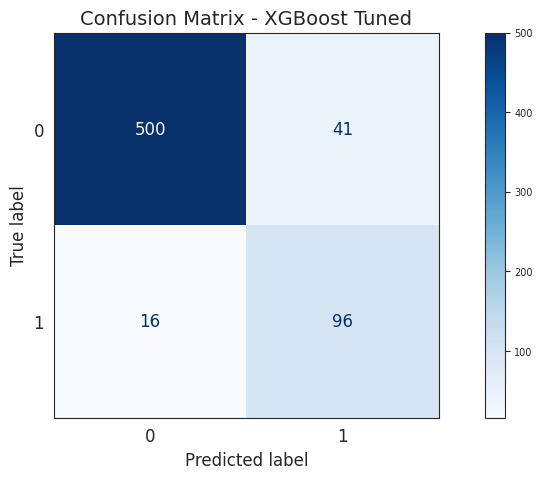

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay, recall_score

cm = confusion_matrix(y_test, y_pred_xgb_tuning)

fig, ax = plt.subplots(figsize=(12, 5))
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot(cmap='Blues', ax=ax, values_format='d')
ax.set_title('Confusion Matrix - XGBoost Tuned', fontsize=14)
ax.set_xlabel('Predicted label', fontsize=12)
ax.set_ylabel('True label', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust the font size for the annotations
for text in cm_display.text_.ravel():
    text.set_fontsize(12)

plt.show()

In [119]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb_tuning).ravel()
tn, fp, fn, tp

(np.int64(500), np.int64(41), np.int64(16), np.int64(96))

In [147]:
# Assumed CAC and CRC in USD
CAC = 75
CRC = 15

# Number of churn customers with existing 16.3% churn rate
churn_rate_noml = 16.3 / 100
churn_number_noml = np.ceil(len(y_test) * churn_rate_noml)

# With ML Model: assuming tp (true positives), fn (false negatives), and fp (false positives) are defined
churn_number_ml = fn
retention_number_ml = tp + fp

# Potential CAC loss
# Without ML Model
churn_loss_noml = churn_number_noml * CAC
# With ML Model
churn_loss_ml = (churn_number_ml * CAC) + (retention_number_ml * CRC)

# Summary in USD
print(f'Potential CAC loss WITHOUT ML MODEL is: {churn_loss_noml:,}')
print(f'Potential CAC loss WITH ML MODEL is: {churn_loss_ml:,}')
print(f'Potential CAC savings is: {(churn_loss_noml - churn_loss_ml):,}')
print(f'Potential CAC savings rate is: {round((1 - (churn_loss_ml / churn_loss_noml)) * 100, 2)}%')



Potential CAC loss WITHOUT ML MODEL is: 8,025.0
Potential CAC loss WITH ML MODEL is: 3,255
Potential CAC savings is: 4,770.0
Potential CAC savings rate is: 59.44%


| Model                         |                |
|-------------------------------|----------------|
| Lost without model            | USD 8,025      |
| With model                    | USD 3,255      | 
| Saving amount                 | USD 4,770      |
| Saving rate                   | 59.44%         |

Using the model to predict customers who, with appropriate retention treatments, do not churn can save up to 59%, equivalent to approximately USD 4,770

## **9. Conclusion & Recommendation**


### **8.1. Conclusion and Key Findings**


**Predictive Power:** Leveraging the XGBoost with an F2 Score of 0.82, we can confidently identify potential churning customers at a 82% accuracy rate.

**Financial Impact:** Implementing the predictive model leads to significant cost savings, reducing Customer Acquisition Cost (CAC) by 59%. Projected savings amount to USD 4,770. 

**Strategic Advantage:** The proactive loyalty promotion program not only retains customers but also optimizes resource allocation, ensuring a competitive edge in the e-commerce market.

**Best model for this case is XGBoost Classifier with F2 Score of 0.84**
- The best model is XGBoost Classifier with F2 Score of 0.82
- The model is able to predict the potential churning customers with 82% confidence.
- The model is able to reduce the potential loss from customer acquisition cost (CAC) by 59% compared to business as usual.

### **8.2. Recommendation**

**Leverage proactive approach to retain existing customers**
- Loyalty promotion program should be offered to the customers who are predicted to be churning by the model.
- Focus on actively resolving the customer complaints, as the EDA indicates that the customers who are churning are more likely to have complaints.
- EDA indicates that average cashback values from churning customers are lower than non-churning customers, the company should consider to increase the cashback amount for the churning customers.

**Apply Machine Learning prediction as the base for customer retention policy**
- The model should be applied to the new customers to predict the potential churning customers.
- The model should be retrained periodically to maintain the model performance.

#### **Save Model**

In [136]:
import pickle

model_final.fit(X_train, y_train)
pickle.dump(model_final, open('models/best_model.pkl', 'wb'))